In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#데이터 재구조화 : pivot -> pivot_table, stack/unstack, melt, crosstab 등
#crosstab:요인별로 교차분석 -> 행, 열 요인 기준 별로 빈도수 -> 도수분포표/교차표 생성

In [7]:
data=pd.DataFrame({
    "id":['id1','id1','id1','id2','id2','id3'],
    'f1':['a','a','a','b','b','b'],
    'f2':['d','d','d','c','c','d']})
data

,id,f1,f2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,b,d


In [8]:
pd.crosstab(data.f1, data.f2)
#crosstab(행인덱스, 컬럼인덱스)

f2,c,d
f1,,
a,0,3
b,2,1


In [9]:
pd.crosstab(data.id, data.f2)

f2,c,d
id,,
id1,0,3
id2,2,0
id3,0,1


In [10]:
#다중인덱스, 다중레벨로 교차표 생성
pd.crosstab(data.id, [data.f1, data.f2])

f1   a  b   
f2   d  c  d
id          
id1  3  0  0
id2  0  2  0
id3  0  0  1

In [12]:
pd.crosstab(data.id, [data.f1, data.f2], rownames=['id_num'], colnames=['col1', 'col2'])

col1    a  b   
col2    d  c  d
id_num         
id1     3  0  0
id2     0  2  0
id3     0  0  1

In [13]:
pd.crosstab(data.id, [data.f1, data.f2], margins=True)

f1   a  b    All
f2   d  c  d    
id              
id1  3  0  0   3
id2  0  2  0   2
id3  0  0  1   1
All  3  2  1   6

In [14]:
pd.crosstab(data.id, [data.f1, data.f2], normalize=True)
# 구성비율

f1     a         b          
f2     d         c         d
id                          
id1  0.5  0.000000  0.000000
id2  0.0  0.333333  0.000000
id3  0.0  0.000000  0.166667

In [15]:
seri=pd.Series([0,1,2,3,4])
seri

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [18]:
seri[:3]

0    0
1    1
2    2
dtype: int64

In [21]:
#퀴즈 1.
#seri의 평균보다 크거나 같은 값들만 추출하시오.
seri[seri>=seri.mean()]


2    2
3    3
4    4
dtype: int64

In [23]:
#퀴즈  2.
# 행 인덱스가 a~e, 데이터가 0~4까지의 값을 갖는 시리즈 생성
seri=pd.Series([0,1,2,3,4], index=['a','b','c','d','e'])
seri

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [26]:
#b, d행 값을 참조하시오
#seri.loc[['b','e']]
#seri.iloc[[1,4]]
seri.get(['b','e'])

b    1
e    4
dtype: int64

In [28]:
seri
#'c' 인덱스가 seri에 들어있는지 확인?
'c' in seri

True

In [31]:
df=pd.DataFrame({
    'c1':[0,1,2,3],
    'c2':[4,5,6,7],
    'c3':[8,9,10,np.nan]},
    index=['r1','r2','r3','r4']
)
df

,c1,c2,c3
r1,0,4,8.0
r2,1,5,9.0
r3,2,6,10.0
r4,3,7,NaN


In [33]:
df.index
df.columns

Index(['c1', 'c2', 'c3'], dtype='object')

In [38]:
#df에서 r1, r3를 추출하여 새로운 데이터프레임 생성
df_r1r3=pd.DataFrame(df, index=['r1','r3'])
df_c1c3=pd.DataFrame(df, columns=['c1','c3'])

In [40]:
#df에서 행:r1,r3  열:c1,c3 추출 -> 데이터프레임 생성
pd.DataFrame(df, index=['r3','r1'], columns=['c1','c3'])

,c1,c3
r3,2,10.0
r1,0,8.0


In [42]:
# df
# df에 c4열 추가 = c1*c2
df['c4']=df['c1']*df['c2']
df

,c1,c2,c3,c4
r1,0,4,8.0,0
r2,1,5,9.0,5
r3,2,6,10.0,12
r4,3,7,NaN,21


In [44]:
df=df.assign(c5=df['c1']*df['c2'])
df

,c1,c2,c3,c4,c5
r1,0,4,8.0,0,0
r2,1,5,9.0,5,5
r3,2,6,10.0,12,12
r4,3,7,NaN,21,21


In [45]:
df.assign(c6=lambda x:x.c1*x.c2) #x에는 데이터프레임(df)이 전달됨

,c1,c2,c3,c4,c5,c6
r1,0,4,8.0,0,0,0
r2,1,5,9.0,5,5,5
r3,2,6,10.0,12,12,12
r4,3,7,NaN,21,21,21


In [46]:
#drop(), del : 데이터프레임 컬럼 제거
#drop() : 원본 데이터프레임에서는 제거되지 않음

In [50]:
df45=df.drop(['c4','c5'],1)
df45

,c1,c2,c3
r1,0,4,8.0
r2,1,5,9.0
r3,2,6,10.0
r4,3,7,NaN


In [51]:
df

,c1,c2,c3,c4,c5
r1,0,4,8.0,0,0
r2,1,5,9.0,5,5
r3,2,6,10.0,12,12
r4,3,7,NaN,21,21


In [52]:
df

,c1,c2,c3,c4,c5
r1,0,4,8.0,0,0
r2,1,5,9.0,5,5
r3,2,6,10.0,12,12
r4,3,7,NaN,21,21


In [53]:
del df['c4'] #원본 데이터프레임에서 컬럼 제거

In [54]:
df

,c1,c2,c3,c5
r1,0,4,8.0,0
r2,1,5,9.0,5
r3,2,6,10.0,12
r4,3,7,NaN,21


In [56]:
#df에서 c2열의 값이 5보다 크거나 같은 모든 데이터를 
df[df['c2']>=5]

,c1,c2,c3,c5
r2,1,5,9.0,5
r3,2,6,10.0,12
r4,3,7,NaN,21


In [61]:
arr1=np.array([1,2,3,4,5])
arr1

array([1, 2, 3, 4, 5])

In [59]:
arr1.dtype
arr1.shape

(5,)

In [60]:
a=np.asarray([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

In [62]:
#array와 asarray
#공통점 : 배열생성
#다른점 :
a=[1,2,3]
a=np.array(a)
type(a)

numpy.ndarray

In [63]:
a=[1,2,3]
a=np.asarray(a)
type(a)

numpy.ndarray

In [64]:
b=np.array([1,2])

In [66]:
np.asarray(b) is b

True

In [67]:
np.asarray(b)
#np.asarray()는 이미 ndarray가 메모리에 있다면 새로 생성하지 않고,
#기존에 메모리에 있는 ndarray를 재사용

array([1, 2])

In [69]:
c=np.array([1,2], dtype=np.float32)
c

array([1., 2.], dtype=float32)

In [73]:
np.asarray(c, dtype=np.float32) #데이터형이 같으므로 복사되지 않음
np.asarray(c, dtype=np.float32) is c #메모리 상에서 같은 주소냐?

True

In [74]:
np.asarray(c, dtype=np.float64) is c #데이터형이 다르므로 복사, 
#메모리 상에서 다른 주소에 복사됨 

False

In [79]:
#np.zeros(5), np.ones(5)
#np.empty(10)
np.zeros((2,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [87]:
f=np.arange(10)
f
f25=f.reshape(2,5)
f25
np.zeros_like(f25)
np.ones_like(f25)
np.empty_like(f25)

np.eye(5)
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
숫자형 : bool, 정수(int8...64), 부동소수점(float16...64), 복소수(complex)
문자형 : string

In [89]:
x64=np.array([1.5, 2.4, 3.7], dtype=np.float64)
x64.dtype

dtype('float64')

In [90]:
np.float64([1.5, 2.4, 3.7])

array([1.5, 2.4, 3.7])

In [92]:
x64.astype(np.int64)
#64bit
#float32:3.4*10의 -38승~+38승
#float32:3.4*10의 -308승~+308승

array([1, 2, 3], dtype=int64)

In [95]:
#부동소수점 -> 문자열
x64s=x64.astype(np.string_)

In [96]:
x64s.astype(np.float64)

array([1.5, 2.4, 3.7])

In [97]:
#배열 원소간 비교연산
x=np.array([1,1,2,2])
y=np.array([1,2,3,4])

In [98]:
np.equal(x,y)

array([ True, False, False, False])

In [99]:
np.greater(x,y) #x>y

array([False, False, False, False])

In [101]:
np.greater_equal(x,y) #x>=y

array([ True, False, False, False])

In [103]:
np.less(x,y) #x<y

array([False,  True,  True,  True])

In [104]:
np.less_equal(x,y) #x<=y

array([ True,  True,  True,  True])

In [105]:
np.array_equal(x,y) #배열이 동일한지?

False

In [106]:
#배열간 논리연산
a=np.array([1,1,0,0])
b=np.array([1,0,1,0])

In [108]:
np.logical_and(a,b) #1:True, 0:False
np.logical_or(a,b) #1:True, 0:False
np.logical_xor(a,b) #1:True, 0:False

array([False,  True,  True, False])

In [116]:
arr=np.arange(20).reshape(5,4)
arr

abc=np.array(['a','a','c,','d','e'])
abc

array(['a', 'a', 'c,', 'd', 'e'], dtype='<U2')

In [117]:
abc=='a'

arr[abc=='a'] #T, T, F, F, F

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [119]:
arr[abc=='a', :2] 

array([[0, 1],
       [4, 5]])

In [120]:
arr[abc=='a', 2] 

array([2, 6])

In [124]:
#특정 조건을 만족하지 않는 모든 열을 선택
abc

arr

arr[abc!='a']

arr[~(abc=='a')] #arr[abc!='a']
# ~ : not

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [132]:
arr
#arr에 저장된 값이 8이상 15 이하인 경우에는 모두 10으로 일괄 변경

arr[(arr>=8) & (arr<=15)]=10 # &(and), |(or)

In [133]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [10, 10, 10, 10],
       [10, 10, 10, 10],
       [16, 17, 18, 19]])

In [136]:
a=np.array([-4.62, -2.19, 1.57, 3.4, 0])
np.trunc(a) #정수만 남김

np.floor(a) #내림(작은 정수 값으로 내림)

np.ceil(a) #올림(큰 정수 값으로 올림)

array([-4., -2.,  2.,  4.,  0.])

In [137]:
b=np.array([1,2,3,4]) #1차원
c=np.array([[1,2],[3,4]]) #2차원

In [141]:
#np.prod(b) #배열 요소간 곱셈

np.prod(c)
np.prod(c, axis=0) #위아래
np.prod(c, axis=1) #좌우

array([ 2, 12])

In [143]:
np.sum(b) #연산을 수행하면 차원이 감소, b=1차원배열 -> sum -> 10=0차원 스칼라값
np.sum(b,keepdims=True)

array([10])

In [144]:
c
np.sum(c, axis=0)
np.sum(c, axis=1)

array([[1, 2],
       [3, 4]])

In [145]:
d=np.array([[1,2], [3,np.nan]])
d

array([[ 1.,  2.],
       [ 3., nan]])

In [149]:
np.prod(d, axis=0)#nan과 곱셈한 결과도 nan

np.nanprod(d, axis=0)
#nanprod:nan을 1로 취급하여 곱셈

np.sum(d,axis=0)

np.nansum(d,axis=0)
#nansum:nan을 0으로 취급하여 덧셈


array([4., 2.])

In [150]:
c

array([[1, 2],
       [3, 4]])

In [151]:
e=np.array([1,2,3,4])

In [152]:
np.cumsum(e)

array([ 1,  3,  6, 10], dtype=int32)

In [155]:
f=np.arange(6).reshape(2,3)
np.cumsum(f)

array([ 0,  1,  3,  6, 10, 15], dtype=int32)

In [156]:
np.cumsum(f, axis=0)

array([[0, 1, 2],
       [3, 5, 7]], dtype=int32)

In [157]:
np.cumsum(f, axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12]], dtype=int32)

In [158]:
g=np.array([1,2,4,10,13,20])

In [159]:
np.diff(g) #1차 차분

array([1, 2, 6, 3, 7])

In [160]:
np.diff(g, 2) #2차 차분

array([ 1,  4, -3,  4])

In [161]:
np.diff(g, 3) #3차 차분

array([ 3, -7,  7])

In [163]:
#np.exp() #밑(base)이  자연상수e인 지수함수로 변환 (y=e의 x승)
x=np.array([0.000000001, 1, 2, 4, 10, 100])

In [164]:
np.exp(x)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 5.45981500e+01,
       2.20264658e+04, 2.68811714e+43])

In [167]:
#지수함수의 역함수 -> 로그함수, 
#로그함수의 밑 자연상수(e), 10, 2

#로그함수의 밑 자연상수(e)
np.log(x)

#로그함수의 밑 10
np.log10(x)

#로그함수의 밑 2
np.log2(x)

array([-29.89735285,   0.        ,   1.        ,   2.        ,
         3.32192809,   6.64385619])

In [169]:
#로그함수에서 x=0 =>  y= -무한대
np.log(0) # -inf
np.log1p(0) #-inf -> 0+1 => 1로 바뀜

<ipython-input-169-6ff6d828c96c>:2: RuntimeWarning: divide by zero encountered in log
  np.log(0) # -inf


0.0

In [ ]:
#지수함수 / 로그함수 ???
#cost function, soft max, 
#정규분포로 변환(로그변환)

#로그변환 : 오른쪽으로 크게 치우져진 멱함수 분포를 -> 정규분포로 변환

#멱함수(power law)?한 수가 다른 수의 거듭제곱으로 표현되는 두 수의 함수적 관계

In [ ]:
# 삼각함수?
# 주기적인 파동 함수(주파수)에서 sin함수. 벡터 내적에서 cos함수, 퓨리에 변환
# degree?원을 360도로 표기
# radian? 부채꼴의 호의 길이와 반지름 길이가 같을때의 각도를 1radian
# 180도 = 파이 라디안
# 1도 =파이 라디안 / 180
# 1라디안 = 180도 / 파이 = 57.xx

In [179]:
np.sin(np.array((0, 30, 45, 60, 90, 180, 270, 360))*np.pi/180)
np.cos(np.array((0, 30, 45, 60, 90, 180, 270, 360))*np.pi/180)
np.tan(np.array((0, 30, 45, 60, 90, 180, 270, 360))*np.pi/180)

array([ 0.00000000e+00,  5.77350269e-01,  1.00000000e+00,  1.73205081e+00,
        1.63312394e+16, -1.22464680e-16,  5.44374645e+15, -2.44929360e-16])

In [182]:
x=np.arange(0, 2*np.pi, 0.1)

In [184]:
y=np.sin(x)

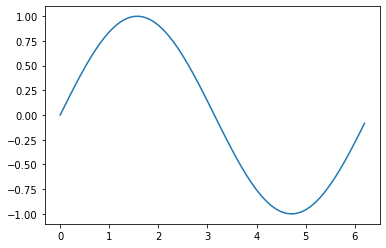

In [185]:
plt.plot(x,y)

In [ ]:
# 삼각함수의 역함수
# 1/sin함수=csc함수
# 1/cos함수=sec함수
# 1/tan함수=cot함수

In [187]:
x=np.array([-100, 1, 4])
np.abs(x)
np.fabs(x) #faster

array([100.,   1.,   4.])

In [194]:
# np.mod(7,4)

# 7 % 4
# 7 // 4

x=np.array([3.5, 7.8, -10.1])
x

array([  3.5,   7.8, -10.1])

In [195]:
np.modf(x)

(array([ 0.5,  0.8, -0.1]), array([  3.,   7., -10.]))

In [196]:
np.modf(x)[0]

array([ 0.5,  0.8, -0.1])

In [197]:
np.modf(x)[1]

array([  3.,   7., -10.])

In [199]:
np.sign(x) #양수:1, 음수:-1, 영:0

array([ 1.,  1., -1.])

In [ ]:
# np.reshape:1차원->다차원
# ravel(), flatten:다차원->1차원

In [203]:
x=np.arange(12).reshape(3,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [205]:
np.ravel(x) 
np.ravel(x, order='C')#default

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [208]:
np.ravel(x, order='f')

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

In [209]:
#배열 연결
a=np.array([1,2,3])
b=np.array([4,5,6])

In [212]:
#두 배열을 좌우로 연결
np.r_[a,b]
np.hstack([a,b])
np.concatenate((a,b)) #default로 axis=0

array([1, 2, 3, 4, 5, 6])

In [218]:
#두 배열을 위아래로 연결
np.r_[[a],[b]] #a,b 를 []사용 -> 1차원 배열 -> 연결
np.vstack([a,b])
#np.concatenate((a,b), axis=1) 1차원 배열 연결 에러발생, 2차원 이상 사용 가능




array([[1, 2, 3],
       [4, 5, 6]])

In [221]:
a=np.array([[0,1],[2,3]])
b=np.array([[1,2],[3,4]])
#np.shape(a)
np.concatenate((a,b), axis=1)

array([[0, 1, 1, 2],
       [2, 3, 3, 4]])

In [222]:
np.c_[a,b]

array([[0, 1, 1, 2],
       [2, 3, 3, 4]])

In [223]:
a=np.array([1,2,3])
b=np.array([4,5,6])

In [225]:
np.c_[a,b] #두 1차원 배열이 컬럼으로 세로로 연결 -> 2차원 배열
np.column_stack([a,b])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [235]:
a=np.array([[0,1],[2,3]])
b=np.array([[1,2],[3,4]])
np.concatenate((a,b), axis=1)
np.concatenate((a,b), axis=0)

np.concatenate((a.T,b.T), axis=1)


array([[0, 2, 1, 3],
       [1, 3, 2, 4]])

In [237]:
x=np.array([4,2,6,3,9,5,10])
np.sort(x) #정렬된 결과에 대한 복사본
x

array([ 4,  2,  6,  3,  9,  5, 10])

In [238]:
x.sort() #x자체적으로 정렬되어 저장
x

array([ 2,  3,  4,  5,  6,  9, 10])

In [241]:
x=np.array([4,2,6,3,9,5,10])
#배열을 거꾸로 정렬하는 방법
np.sort(x)[::-1]

array([10,  9,  6,  5,  4,  3,  2])

In [243]:
x
x[::-1]

array([10,  5,  9,  3,  6,  2,  4])

In [246]:
print(x)
print(np.argsort(x))
print(x[np.argsort(x)])

[ 4  2  6  3  9  5 10]
[1 3 0 5 2 4 6]
[ 2  3  4  5  6  9 10]


In [249]:
print(np.argsort(-x)) #역순
print(x[np.argsort(-x)])

[6 4 2 5 0 3 1]
[10  9  6  5  4  3  2]


In [250]:
x=np.array([[2,1,6],
           [0,7,4],
           [5,3,2]])
x

array([[2, 1, 6],
       [0, 7, 4],
       [5, 3, 2]])

In [252]:
np.sort(x) #axis=1 default
np.sort(x, axis=1)

array([[1, 2, 6],
       [0, 4, 7],
       [2, 3, 5]])

In [253]:
np.sort(x, axis=0)

array([[0, 1, 2],
       [2, 3, 4],
       [5, 7, 6]])

In [254]:
np.sort(x, axis=0)[::-1]

array([[5, 7, 6],
       [2, 3, 4],
       [0, 1, 2]])

In [256]:
#데이터프레임 : 데이터프레임.sort_values()
#리스트 : 리스트.sort(), sorted(리스트)